In [1]:
# importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [2]:
# reading in the dataset as a csv file

df = pd.read_csv('/kaggle/input/rollercoaster-database/coaster_db.csv')

In [3]:
# viewing the overall number of columns and rows of the dataset

df.shape

(1087, 56)

In [4]:
# showing the first 5 rows of the dataset

df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [5]:
# showing all the rows of the columns in the dataset

df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
# including only columns that I wanted to see

df = df[['coaster_name', 'Location', 'Status', 
    'Manufacturer', 'year_introduced', 'latitude', 'longitude',
    'opening_date_clean', 'speed_mph', 'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

In [7]:
# showing the data types of the dataset
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [8]:
# changing the opening_date_clean column from object data type to datetime

df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [9]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'opening_date_clean', 'speed_mph', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
# renaming the columns

df = df.rename(columns={'coaster_name':'Coaster_Name',
                       'year_introduced':'Year_Introduced',
                       'opening_date_clean': 'Opening_Date',
                       'speed_mph': 'Speed_mph',
                       'height_ft':'Height_ft',
                       'Inversions_clean':'Inversions',
                       'Gforce_clean':'Gforce'})

In [11]:
# showing the sum of null values in all columns of dataset

df.isnull().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [12]:
# showing the duplicated values in the dataset
df.duplicated().sum()

0

In [13]:
df['Year_Introduced'].value_counts()

1999    49
2000    47
1998    32
2011    31
2001    30
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_Introduced, Length: 101, dtype: int64

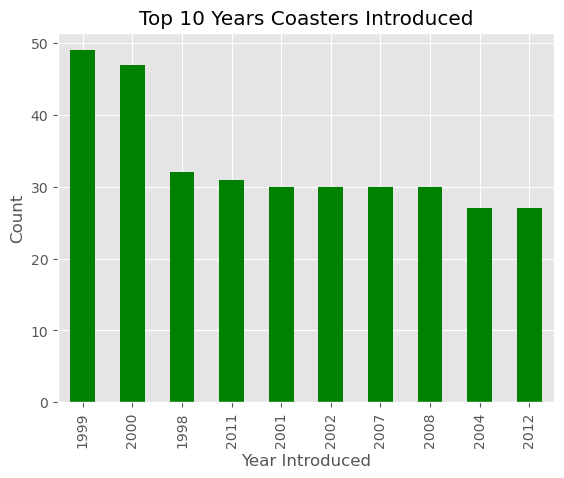

In [14]:
# showing a bar plot considering the top 10 years roller coasters were introduced

ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced',
         color="green")
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')
plt.show()


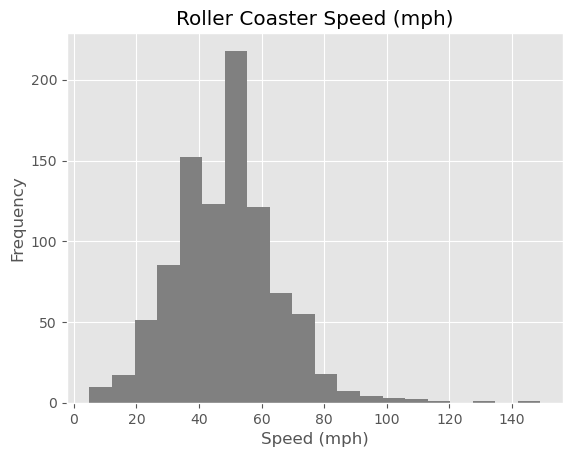

In [15]:
# displaying the distribution of common speed of roller coasters

ax = df['Speed_mph'].plot(kind='hist',
                         bins=20,
                         title='Roller Coaster Speed (mph)',
                         color="grey")
ax.set_xlabel('Speed (mph)')
plt.show()

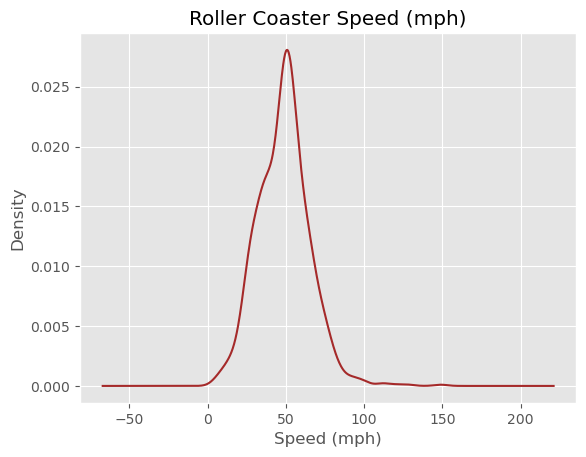

In [16]:
# showing a density plot of the common speeds of the roller coasters


ax = df['Speed_mph'].plot(kind='kde',
                         title='Roller Coaster Speed (mph)',
                         color="brown")
ax.set_xlabel('Speed (mph)')
plt.show()

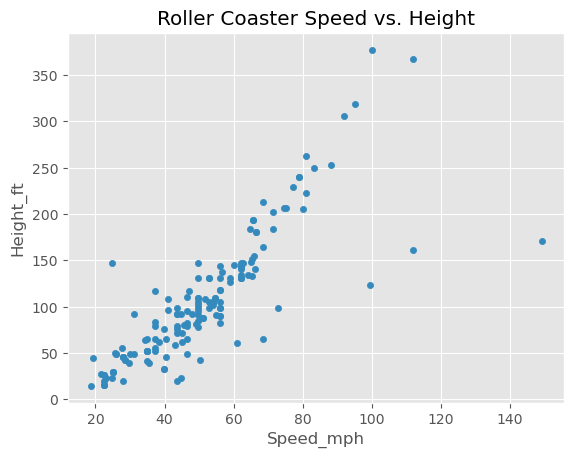

In [17]:
df.plot(kind='scatter',
       x='Speed_mph',
       y='Height_ft',
       title='Roller Coaster Speed vs. Height',
       )
plt.show()

In [18]:
# showing the correlation of a subset of the dataset

df_corr = df[['Year_Introduced', 'Speed_mph',
             'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.178619,0.145457,-0.172829,0.168763
Speed_mph,0.178619,1.000000,0.734499,-0.026413,0.605090
Height_ft,0.145457,0.734499,1.000000,-0.076255,0.460841
Inversions,-0.172829,-0.026413,-0.076255,1.000000,0.270942
Gforce,0.168763,0.605090,0.460841,0.270942,1.000000


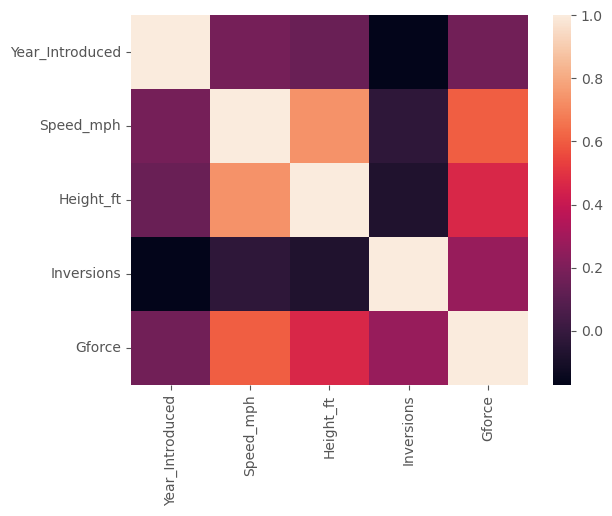

In [19]:
# showing a correlation heatmap

sns.heatmap(df_corr)
plt.show()

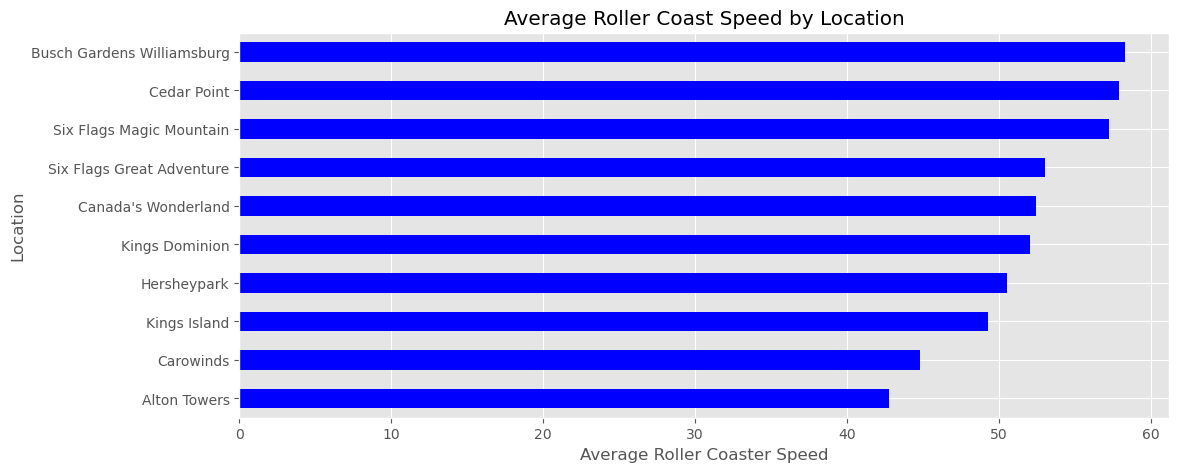

In [20]:
# What are the locations with the fastest roller coasters (minimum of of 10)?

ax = df.query('Location != "Other"') \
     .groupby('Location')['Speed_mph'] \
     .agg(['mean', 'count']) \
     .query('count > 10')\
     .sort_values('mean')['mean'] \
     .plot(kind='barh', figsize=(12, 5), title='Average Roller Coast Speed by Location',
          color="blue")
ax.set_xlabel('Average Roller Coaster Speed')
plt.show()